# Prelim Analysis of new full dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CARIACO = pd.read_csv("../DATA/Combined_CARIACO_data_v3.csv")

In [3]:
CARIACO['date'] = pd.to_datetime(CARIACO['time_month'])

In [4]:
CARIACO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    298 non-null    int64         
 1   cdww                          297 non-null    float64       
 2   iews                          297 non-null    float64       
 3   inss                          297 non-null    float64       
 4   mcc                           297 non-null    float64       
 5   mwp                           297 non-null    float64       
 6   si10                          297 non-null    float64       
 7   sp                            298 non-null    float64       
 8   sst                           297 non-null    float64       
 9   t2m                           297 non-null    float64       
 10  tauoc                         297 non-null    float64       
 11  u10                           2

In [5]:
CARIACO.columns.values

array(['Unnamed: 0', 'cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp',
       'sst', 't2m', 'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind',
       'time_month', 'cdir', 'e', 'ewss', 'i10fg', 'lsp', 'magss', 'mer',
       'metss', 'mmtss', 'mntss', 'mtpr', 'nsss', 'sshf', 'tp', 'O2_ml_L',
       'O2_umol_kg', 'NO3_UDO', 'PO4_UDO', 'SiO4_UDO', 'NH4_USF',
       'NO2_USF', 'NO3_NO2_USF', 'PO4_USF', 'SiO4_USF', 'pH',
       'Alkalinity_mol_kg', 'Alkalinity_umol_kg', 'TCO2', 'fCO2',
       'pH_corrected', 'TCO2_corrected', 'fCO2_corrected',
       'Salinity_bottles', 'Salinity_CTD', 'Temperature', 'Sigma_t',
       'TPP', 'PIP', 'POC_ug_kg', 'PON_ug_kg', 'POC_ug_L', 'PN_ug_L',
       'C_N_particulate', 'DON', 'DOP', 'DOC', 'TOC',
       'PrimaryProductivity', 'Chlorophyll', 'Phaeopigments',
       'Total_Prokaryotes', 'Bact_Biomass_mgC_m3', 'Bact_Biomass_uMC',
       'NO3_USF', 'NO3_merged', 'PO4_merged', 'SiO4_merged', 'temp_5',
       'temp_15', 'temp_25', 'temp_75', 'Isopycnal_21'

### log transform biological data

In [6]:
columns2logtransform = [
    'Chlorophyll', 'Satellite_chla', 'SeaWiFS_chla', 'MODIS_chla',
]

In [7]:
for colum in columns2logtransform:
    CARIACO[colum] = np.log10(CARIACO[colum]+0.00000001)

# add ESTEBANS code

In [8]:
CARIACO_SUB1 = CARIACO[['u10',
         'sst',
         'mtpr',
         'cdir',
         'e',
         'Satellite_chla',
        ]].dropna()

In [9]:
CARIACO_SUB1.columns

Index(['u10', 'sst', 'mtpr', 'cdir', 'e', 'Satellite_chla'], dtype='object')

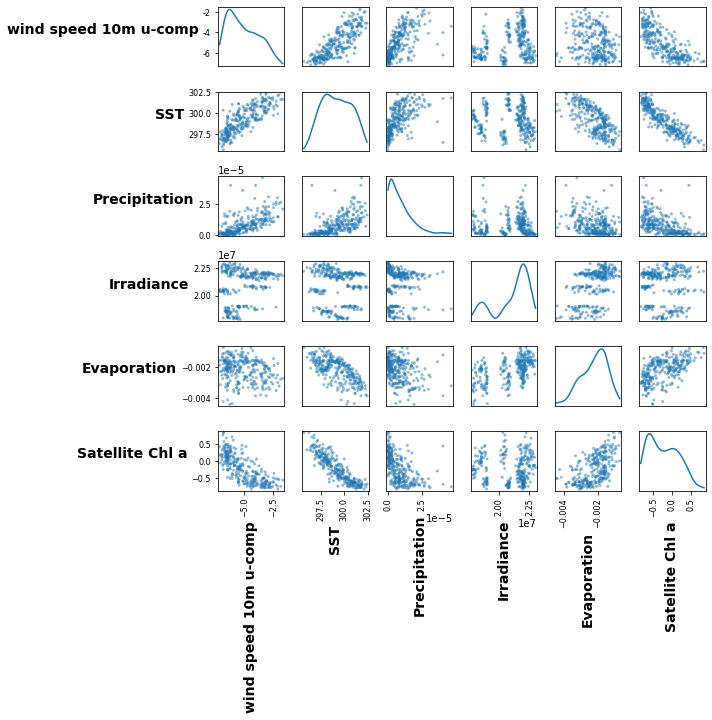

In [43]:

# removed MLD
#dataP = pd.read_csv("12DS_WIND_NISKING_MLD_merge.csv", usecols=[1,4,6,8,9,10,11])  # , header=0)  # usecols=[1,2,3,6,7,8,9],
#CARIACO_SUB1.dropna(inplace=True)

#cols = list(dataP.columns.values)
#newcols = cols[-1:] + cols[:-1]
#dataP = dataP[newcols]

# LOG transform Chlorophyll Phaeopigments and PP
#import numpy as np
#dataP['Chlorophyll'] = np.log10(dataP['Chlorophyll'])
#dataP['Phaeopigments'] = np.log10(dataP['Phaeopigments'])
#dataP['PrimaryProductivity'] = np.log10(dataP['PrimaryProductivity'])

#plt.rcParams['figure.figsize'] = [20, 20]
#plt.rcParams.update({'font.size': 10})

ax0 = pd.plotting.scatter_matrix(CARIACO_SUB1, diagonal='kde', figsize=(10, 10))

for ax in ax0.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

#ax0[0, 0].set_ylabel(r'$\mathbf{N_{par_Z}}$', fontsize=14, weight='bold')
colnamelist = ['wind speed 10m u-comp', 'SST', 'Precipitation', 'Irradiance',
               'Evaporation', 'Satellite Chl a']
ax0[0, 0].set_ylabel(colnamelist[0], fontsize=14, weight='bold')
ax0[1, 0].set_ylabel(colnamelist[1], fontsize=14, weight='bold')
ax0[2, 0].set_ylabel(colnamelist[2], fontsize=14, weight='bold')
ax0[3, 0].set_ylabel(colnamelist[3], fontsize=14, weight='bold')
ax0[4, 0].set_ylabel(colnamelist[4], fontsize=14, weight='bold')
ax0[5, 0].set_ylabel(colnamelist[5], fontsize=14, weight='bold')
#ax0[6, 0].set_ylabel(colnamelist[6], fontsize=14, weight='bold')
#ax0[7, 0].set_ylabel(colnamelist[7], fontsize=14, weight='bold')
#ax0[8, 0].set_ylabel(colnamelist[8], fontsize=14, weight='bold')
#ax0[9, 0].set_ylabel(colnamelist[9], fontsize=14, weight='bold')
#ax0[10, 0].set_ylabel(colnamelist[10], fontsize=14, weight='bold')
#ax0[11, 0].set_ylabel(colnamelist[11], fontsize=14, weight='bold')

ax0[5, 0].set_xlabel(colnamelist[0], fontsize=14, weight='bold')
ax0[5, 1].set_xlabel(colnamelist[1], fontsize=14, weight='bold')
ax0[5, 2].set_xlabel(colnamelist[2], fontsize=14, weight='bold')
ax0[5, 3].set_xlabel(colnamelist[3], fontsize=14, weight='bold')
ax0[5, 4].set_xlabel(colnamelist[4], fontsize=14, weight='bold')
ax0[5, 5].set_xlabel(colnamelist[5], fontsize=14, weight='bold')
#ax0[10, 6].set_xlabel(colnamelist[6], fontsize=14, weight='bold')
#ax0[10, 7].set_xlabel(colnamelist[7], fontsize=14, weight='bold')
#ax0[10, 8].set_xlabel(colnamelist[8], fontsize=14, weight='bold')
#ax0[10, 9].set_xlabel(colnamelist[9], fontsize=14, weight='bold')
#ax0[10, 10].set_xlabel(colnamelist[10], fontsize=14, weight='bold')
#ax0[11, 11].set_xlabel(colnamelist[11], fontsize=14, weight='bold')
plt.tight_layout()
#plt.show()
plt.savefig('Plots/PRESENTATION_ScatterMatrix.png')


In [12]:
colnamelist

['wind speed 10m u-comp',
 'SST',
 'Precipitation',
 'Irradiance',
 'Evaporation',
 'Satellite Chl a']

In [13]:
dataP = CARIACO_SUB1

colnum = len(colnamelist)

In [19]:

pca_pytho.explained_variance_ratio_[0:2] * 100

array([57.71007573, 25.10779193])

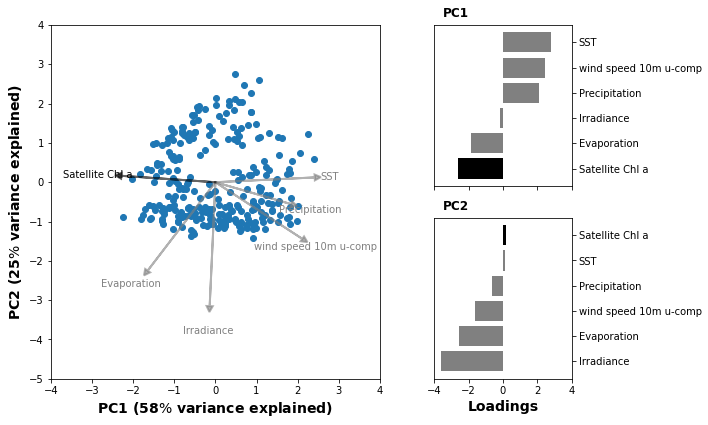

In [44]:
# ------------------------------
# Principal Component Analysis 
# ------------------------------
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.gridspec import GridSpec

scaler = StandardScaler()
scaler.fit(dataP)
scaled_dataP = scaler.transform(dataP)

pca_pytho = PCA(n_components=colnum, whiten=True)
pcaresult = pca_pytho.fit_transform(scaled_dataP)
pca_pytho.explained_variance_ratio_[0:2] * 100
pcacoef = pd.DataFrame(columns=['PC1', 'PC2', 'VarName', 'VarColor'])
pcacoef.PC1 = np.transpose(pca_pytho.components_)[:, 0]
pcacoef.PC2 = np.transpose(pca_pytho.components_)[:, 1]
pcacoef.VarName = colnamelist
pcacoef.VarColor = ['grey', 'grey', 'grey', 'grey', 'grey', 'black']
scalex = 1. / (pcaresult[:, 0].max() - pcaresult[:, 0].min())
scaley = 1. / (pcaresult[:, 1].max() - pcaresult[:, 1].min())

# need more values here
offsetx = [1.15, 1.15, 1.25, 1.25, 1.25, 1.25]
offsety = [1.15, 1.15, 1.25, 1.20, 1.15, 1.10]

fig1 = plt.figure()
gs = GridSpec(4, 4)
ax1 = plt.subplot(gs[:, 1:3])
ax2 = plt.subplot(gs[0:2, 3:4])
ax3 = plt.subplot(gs[2:4, 3:4])

ax1.scatter(pcaresult[:, 0], pcaresult[:, 1])
for i in range(pcacoef.shape[0]):
    ax1.arrow(0, 0, pcacoef.PC1[i] / scalex, pcacoef.PC2[i] / scaley, color=pcacoef.VarColor[i], linewidth=2, alpha=0.6,
              head_width=0.15, head_length=0.15)
    ax1.text(pcacoef.PC1[i] * offsetx[i] / scalex, pcacoef.PC2[i] * offsety[i] / scaley, pcacoef.VarName[i],
             color=pcacoef.VarColor[i], ha='center', va='center')
ax1.set_xlim(-4, 4)
ax1.set_ylim(-5, 4)
ax1.set_xlabel(r'PC1 (58$\%$ variance explained)', fontsize=14, weight='bold')
ax1.set_ylabel(r'PC2 (25$\%$ variance explained)', fontsize=14, weight='bold')

ax2.barh(range(colnum), pcacoef.sort_values(by=['PC1']).PC1 * 1.15 / scalex, color=pcacoef.sort_values(by=['PC1']).VarColor)
ax2.set_xlim(-4, 4)
ax2.set_xticklabels([])
ax2.yaxis.tick_right()
ax2.set_yticks(np.arange(colnum))
ax2.set_yticklabels(pcacoef.sort_values(by=['PC1']).VarName)
ax2.text(-3.5, 6, 'PC1', fontsize=12, weight='bold')

ax3.barh(range(colnum), pcacoef.sort_values(by=['PC2']).PC2 * 1.15 / scaley, color=pcacoef.sort_values(by=['PC2']).VarColor)
ax3.set_xlim(-4, 4)
ax3.yaxis.tick_right()
ax3.set_yticks(np.arange(colnum))
ax3.set_yticklabels(pcacoef.sort_values(by=['PC2']).VarName)
ax3.set_xlabel('Loadings', fontsize=14, weight='bold')
ax3.text(-3.5, 6, 'PC2', fontsize=12, weight='bold')

fig1.set_figheight(6)
fig1.set_figwidth(12)
plt.tight_layout()
#plt.show()
fig1.savefig('Plots/PRESENTATION_PCA_tests.png')


# RANDOM FOREST

/Users/bpo/opt/anaconda3/envs/xsimlab2/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RF Chlorophyll: oob-error=0.20, r^2=0.79, % variance explained=80.97
                 VarName  Satellite_chla
0  wind speed 10m u-comp        4.094291
1                    SST       84.041649
2          Precipitation        2.641203
3             Irradiance        5.124017
4            Evaporation        4.098840
2     2.641203
0     4.094291
4     4.098840
3     5.124017
1    84.041649
Name: Satellite_chla, dtype: float64
RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)


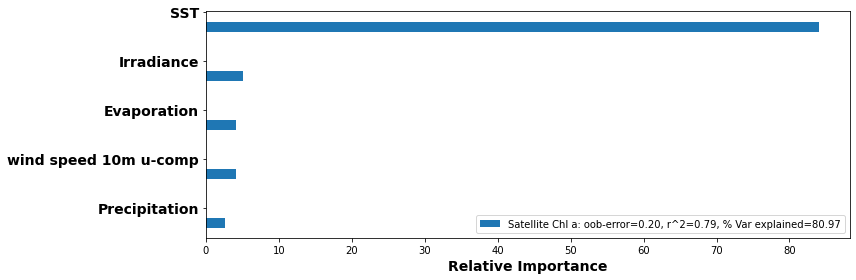

In [41]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

testsize = 0.25
vars2take = [0, 1, 2, 3, 4]
#Chlorophyll
X_trainBiom, X_testBiom, y_trainBiom, y_testBiom = train_test_split(dataP.take(vars2take, axis=1), 
                                                                    dataP.Satellite_chla,
                                                                    test_size=testsize)
RFregBiomass = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
RFregBiomass.fit(X_trainBiom, y_trainBiom)
predicted_testBiom = RFregBiomass.predict(X_testBiom)




print('RF Chlorophyll: oob-error=%.2f, r^2=%.2f, %% variance explained=%.2f' % (
    1. - RFregBiomass.oob_score_, RFregBiomass.score(X_testBiom, y_testBiom),
    explained_variance_score(y_testBiom, predicted_testBiom) * 100))



# change attributes below!
RFVarImp = pd.DataFrame(columns=['VarName', 'Satellite_chla'])
RFVarImp.VarName = colnamelist[:5]
RFVarImp.Satellite_chla = RFregBiomass.feature_importances_ * 100

print(RFVarImp)
print(RFVarImp.sort_values(by=['Satellite_chla']).Satellite_chla)
print(RFregBiomass)


fig2 = plt.figure()
varRFnum = 5
plt.barh(np.arange(varRFnum) - 0.3, RFVarImp.sort_values(by=['Satellite_chla']).Satellite_chla, height=.2,
         label='Satellite Chl a: oob-error=%.2f, r^2=%.2f, %% Var explained=%.2f' % (
             1. - RFregBiomass.oob_score_, RFregBiomass.score(X_testBiom, y_testBiom),
             explained_variance_score(y_testBiom, predicted_testBiom) * 100))



plt.yticks(np.arange(varRFnum), RFVarImp.sort_values(by=['Satellite_chla']).VarName, fontsize=14, weight='bold')
plt.xlabel('Relative Importance', fontsize=14, weight='bold')
plt.legend()#fontsize='x-small')
fig2.set_figheight(4)
fig2.set_figwidth(12)
plt.tight_layout()
plt.show()
fig2.savefig('PRESENTATION_TEST_RandomFOrest.png')

In [ ]:

# --------------------------------
# Loading and visualizing dataset
# --------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# removed MLD
dataP = pd.read_csv("12DS_WIND_NISKING_MLD_merge.csv", usecols=[1,4,6,8,9,10,11])  # , header=0)  # usecols=[1,2,3,6,7,8,9],
dataP.dropna(inplace=True)

cols = list(dataP.columns.values)
newcols = cols[-1:] + cols[:-1]
dataP = dataP[newcols]

# LOG transform Chlorophyll Phaeopigments and PP
import numpy as np
dataP['Chlorophyll'] = np.log10(dataP['Chlorophyll'])
dataP['Phaeopigments'] = np.log10(dataP['Phaeopigments'])
dataP['PrimaryProductivity'] = np.log10(dataP['PrimaryProductivity'])

ax0 = pd.plotting.scatter_matrix(dataP, diagonal='kde', figsize=(12, 10))

for ax in ax0.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

#ax0[0, 0].set_ylabel(r'$\mathbf{N_{par_Z}}$', fontsize=14, weight='bold')
colnamelist = ['MLD', 'u comp Wind',
               'SST', 'Total Precipitation', 'Chlorophyll',
               'Phaeopigment', 'PP']
ax0[0, 0].set_ylabel('MLD', fontsize=14, weight='bold')
ax0[1, 0].set_ylabel('u comp Wind', fontsize=14, weight='bold')
ax0[2, 0].set_ylabel('SST', fontsize=14, weight='bold')
ax0[3, 0].set_ylabel('Total\n Precipitation', fontsize=14, weight='bold')
ax0[4, 0].set_ylabel('Chlorophyll', fontsize=14, weight='bold')
ax0[5, 0].set_ylabel('Phaeopigment', fontsize=14, weight='bold')
ax0[6, 0].set_ylabel('PP', fontsize=14, weight='bold')

ax0[6, 0].set_xlabel('MLD', fontsize=14, weight='bold')
ax0[6, 1].set_xlabel('u comp Wind', fontsize=14, weight='bold')
ax0[6, 2].set_xlabel('SST', fontsize=14, weight='bold')
ax0[6, 3].set_xlabel('Total\n Precipitation', fontsize=14, weight='bold')
ax0[6, 4].set_xlabel('Chlorophyll', fontsize=14, weight='bold')
ax0[6, 5].set_xlabel('Phaeopigment', fontsize=14, weight='bold')
ax0[6, 6].set_xlabel('PP', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
plt.savefig('scatter_plot_matrix_4th_checkMLDinsteadof21ISO.png')

# ------------------------------
# Principal Component Analysis 
# ------------------------------
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.gridspec import GridSpec

scaler = StandardScaler()
scaler.fit(dataP)
scaled_dataP = scaler.transform(dataP)

pca_pytho = PCA(n_components=7, whiten=True)
pcaresult = pca_pytho.fit_transform(scaled_dataP)
pca_pytho.explained_variance_ratio_[0:2] * 100
pcacoef = pd.DataFrame(columns=['PC1', 'PC2', 'VarName', 'VarColor'])
pcacoef.PC1 = np.transpose(pca_pytho.components_)[:, 0]
pcacoef.PC2 = np.transpose(pca_pytho.components_)[:, 1]
pcacoef.VarName = colnamelist
pcacoef.VarColor = ['grey', 'grey', 'grey', 'grey', 'black', 'black', 'black']
scalex = 1. / (pcaresult[:, 0].max() - pcaresult[:, 0].min())
scaley = 1. / (pcaresult[:, 1].max() - pcaresult[:, 1].min())

# need more values here
offsetx = [1.15, 1.15, 1.25, 1.25, 1.55, 1.45, 1.45]
offsety = [1.15, 1.15, 1.15, 1.25, 0.80, 1.15, 1.10]

fig1 = plt.figure()
gs = GridSpec(4, 4)
ax1 = plt.subplot(gs[:, 1:3])
ax2 = plt.subplot(gs[0:2, 3:4])
ax3 = plt.subplot(gs[2:4, 3:4])

ax1.scatter(pcaresult[:, 0], pcaresult[:, 1])
for i in range(pcacoef.shape[0]):
    ax1.arrow(0, 0, pcacoef.PC1[i] / scalex, pcacoef.PC2[i] / scaley, color=pcacoef.VarColor[i], linewidth=2, alpha=0.6,
              head_width=0.15, head_length=0.15)
    ax1.text(pcacoef.PC1[i] * offsetx[i] / scalex, pcacoef.PC2[i] * offsety[i] / scaley, pcacoef.VarName[i],
             color=pcacoef.VarColor[i], ha='center', va='center')
ax1.set_xlim(-4, 4)
ax1.set_ylim(-3, 4)
ax1.set_xlabel(r'PC1 (53$\%$ variance explained)', fontsize=14, weight='bold')
ax1.set_ylabel(r'PC2 (18$\%$ variance explained)', fontsize=14, weight='bold')

ax2.barh(range(7), pcacoef.sort_values(by=['PC1']).PC1 * 1.15 / scalex, color=pcacoef.sort_values(by=['PC1']).VarColor)
ax2.set_xlim(-4, 4)
ax2.set_xticklabels([])
ax2.yaxis.tick_right()
ax2.set_yticks(np.arange(7))
ax2.set_yticklabels(pcacoef.sort_values(by=['PC1']).VarName)
ax2.text(-3.5, 6, 'PC1', fontsize=12, weight='bold')

ax3.barh(range(7), pcacoef.sort_values(by=['PC2']).PC2 * 1.15 / scaley, color=pcacoef.sort_values(by=['PC2']).VarColor)
ax3.set_xlim(-4, 4)
ax3.yaxis.tick_right()
ax3.set_yticks(np.arange(7))
ax3.set_yticklabels(pcacoef.sort_values(by=['PC2']).VarName)
ax3.set_xlabel('Loadings', fontsize=14, weight='bold')
ax3.text(-3.5, 6, 'PC2', fontsize=12, weight='bold')

fig1.set_figheight(6)
fig1.set_figwidth(12)
plt.show()
fig1.savefig('PCA_4th_checkMLDinsteadof21ISO.png')

# ------------------------------
# Random Forest 
# ------------------------------

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

testsize = 0.25
vars2take = [0, 1, 2, 3]
#Chlorophyll
X_trainBiom, X_testBiom, y_trainBiom, y_testBiom = train_test_split(dataP.take(vars2take, axis=1), dataP.Chlorophyll,
                                                                    test_size=testsize)
RFregBiomass = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
RFregBiomass.fit(X_trainBiom, y_trainBiom)
predicted_testBiom = RFregBiomass.predict(X_testBiom)
#Phaeopigments
X_trainMsize, X_testMsize, y_trainMsize, y_testMsize = train_test_split(dataP.take(vars2take, axis=1),
                                                                        dataP.Phaeopigments, test_size=testsize)
RFregMsize = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
RFregMsize.fit(X_trainMsize, y_trainMsize)
predicted_testMsize = RFregMsize.predict(X_testMsize)
#PrimaryProductivity
X_trainQdiv, X_testQdiv, y_trainQdiv, y_testQdiv = train_test_split(dataP.take(vars2take, axis=1),
                                                                    dataP.PrimaryProductivity, test_size=testsize)
RFregQdiv = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
RFregQdiv.fit(X_trainQdiv, y_trainQdiv)
predicted_testQdiv = RFregQdiv.predict(X_testQdiv)

print('RF Chlorophyll: oob-error=%.2f, r^2=%.2f, %% variance explained=%.2f' % (
    1. - RFregBiomass.oob_score_, RFregBiomass.score(X_testBiom, y_testBiom),
    explained_variance_score(y_testBiom, predicted_testBiom) * 100))
print('RF Phaeopigment: oob-error=%.2f, r^2=%.2f, %% variance explained=%.2f' % (
    1. - RFregMsize.oob_score_, RFregMsize.score(X_testMsize, y_testMsize),
    explained_variance_score(y_testMsize, predicted_testMsize) * 100))
print('RF PrimaryProductivity: oob-error=%.2f, r^2=%.2f, %% variance explained=%.2f' % (
    1. - RFregQdiv.oob_score_, RFregQdiv.score(X_testQdiv, y_testQdiv),
    explained_variance_score(y_testQdiv, predicted_testQdiv) * 100))

# change attributes below!
RFVarImp = pd.DataFrame(columns=['VarName', 'Chlorophyll', 'Phaeopigments', 'PrimaryProductivity'])
RFVarImp.VarName = colnamelist[:4]
RFVarImp.Chlorophyll = RFregBiomass.feature_importances_ * 100
RFVarImp.Phaeopigments = RFregMsize.feature_importances_ * 100
RFVarImp.PrimaryProductivity = RFregQdiv.feature_importances_ * 100

fig2 = plt.figure()
varRFnum = 4
plt.barh(np.arange(varRFnum) - 0.2, RFVarImp.sort_values(by=['Chlorophyll']).Chlorophyll, height=0.2,
         label='Chlorophyll: oob-error=%.2f, r^2=%.2f, %% Var explained=%.2f' % (
             1. - RFregBiomass.oob_score_, RFregBiomass.score(X_testBiom, y_testBiom),
             explained_variance_score(y_testBiom, predicted_testBiom) * 100))
plt.barh(np.arange(varRFnum), RFVarImp.sort_values(by=['Chlorophyll']).Phaeopigments, height=0.2,
         label='Phaeopigments: oob-error=%.2f, r^2=%.2f, %% Var explained=%.2f' % (
             1. - RFregMsize.oob_score_, RFregMsize.score(X_testMsize, y_testMsize),
             explained_variance_score(y_testMsize, predicted_testMsize) * 100))
plt.barh(np.arange(varRFnum) + 0.2, RFVarImp.sort_values(by=['Chlorophyll']).PrimaryProductivity, height=0.2,
         label='PrimaryProductivity: oob-error=%.2f, r^2=%.2f, %% Var explained=%.2f' % (
             1. - RFregQdiv.oob_score_, RFregQdiv.score(X_testQdiv, y_testQdiv),
             explained_variance_score(y_testQdiv, predicted_testQdiv) * 100))
plt.yticks(np.arange(varRFnum), RFVarImp.sort_values(by=['Chlorophyll']).VarName, fontsize=14, weight='bold')
plt.xlabel('Relative Importance', fontsize=14, weight='bold')
plt.legend()
fig2.set_figheight(6)
fig2.set_figwidth(12)
plt.tight_layout()
plt.show()
fig2.savefig('RFVarImportance_4th_checkMLDinsteadof21ISO.png')

import random as rd

fig3 = plt.figure()
plt.barh(np.arange(varRFnum) - 0.2, [rd.uniform(0, 100) for p in range(0, varRFnum)], height=0.2, label='Chlorophyll')
plt.barh(np.arange(varRFnum), [rd.uniform(0, 100) for p in range(0, varRFnum)], height=0.2, label='Phaeopigments')
plt.barh(np.arange(varRFnum) + 0.2, [rd.uniform(0, 100) for p in range(0, varRFnum)], height=0.2, label='PrimaryProductivity')
plt.yticks(np.arange(varRFnum), RFVarImp.sort_values(by=['Chlorophyll']).VarName, fontsize=14, weight='bold')
plt.xlabel('Relative Importance', fontsize=14, weight='bold')
plt.title('Variable importance with dummy data')
plt.legend()
fig3.set_figheight(6)
fig3.set_figwidth(10)
plt.tight_layout()
plt.show()
fig3.savefig('RFVarImportance_Dummy_4th_checkMLDinsteadof21ISO.png')



# DOESN'T WORK ANYMORE! sklearn updated function usage, could use old version though for now
# -------------------------------------
# Optional: calculate GradientBoosting
# and Partial dependence plots
# -------------------------------------

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay

from sklearn.inspection import plot_partial_dependence

clfBiomass = GradientBoostingRegressor(n_estimators=500, random_state=0)
clfBiomass.fit(X_trainBiom, y_trainBiom)

clfMsize = GradientBoostingRegressor(n_estimators=500, random_state=0)
clfMsize.fit(X_trainMsize, y_trainMsize)

clfQdiv = GradientBoostingRegressor(n_estimators=500, random_state=0)
clfQdiv.fit(X_trainQdiv, y_trainQdiv)

fig4, axs4 = plt.subplots(figsize=(12, 8))
axs4.set_title("Chlorophyll")
PartialDependenceDisplay.from_estimator(clfBiomass, X_trainBiom,
                                                     [0, 1, 2, 3, (0, 2), (1, 2), (3, 2), (0, 1)], ax=axs4)
fig4.tight_layout()
fig4.show()
fig4.savefig('PDP_Chlorophyll_4MLD.png')


fig5, axs5 = plt.subplots(figsize=(12, 8))
axs5.set_title("Phaeopigments")
PartialDependenceDisplay.from_estimator(clfMsize, X_trainMsize,
                                                     [0, 1, 2, 3, (0, 2), (1, 2), (3, 2), (0, 1)], ax=axs5)
fig5.tight_layout()
fig5.show()
fig5.savefig('PDP_Phaeopigments_4MLD.png')


fig6, axs6 = plt.subplots(figsize=(12, 8))
axs6.set_title("PrimaryProductivity")
PartialDependenceDisplay.from_estimator(clfQdiv, X_trainQdiv,
                                                     [0, 1, 2, 3, (0, 2), (1, 2), (3, 2), (0, 1)], ax=axs6)
fig6.tight_layout()
fig6.show()
fig6.savefig('PDP_PrimaryProductivity_4MLD.png')



